# Exploratory Data Analysis - Countries Visa-Free Access

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'countries_visa_free_access.csv'
data = pd.read_csv(file_path)

# Display basic information
print('Shape:', data.shape)
print('Columns:', data.columns.tolist())
print('Missing Values:', data.isnull().sum())

# Display first few rows
data.head()

Shape: (199, 3)
Columns: ['Country', 'Rank', 'Visa-Free Access']
Missing Values: Country             0
Rank                0
Visa-Free Access    0
dtype: int64


,Country,Rank,Visa-Free Access
0,Singapore,1st,195
1,Finland,2nd,192
2,France,2nd,192
3,Germany,2nd,192
4,Italy,2nd,192


## Análisis Estadístico Descriptivo

In [6]:
# Estadísticas descriptivas
data.describe(include='all')

,Country,Rank,Visa-Free Access
count,199,199,199.000000
unique,199,106,NaN
top,Singapore,3rd,NaN
freq,1,7,NaN
mean,NaN,NaN,110.738693
std,NaN,NaN,54.622137
min,NaN,NaN,26.000000
25%,NaN,NaN,60.000000
50%,NaN,NaN,95.000000
75%,NaN,NaN,165.500000


## Visualización de Datos

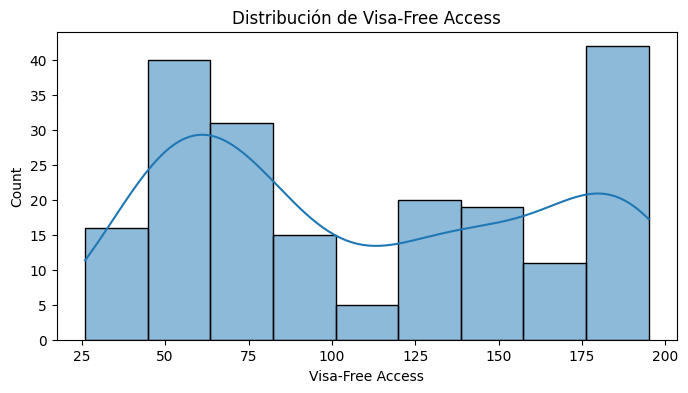

In [7]:
# Visualización de distribuciones
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

## Identificación de Valores Nulos y Outliers

In [8]:
# Filtrar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Eliminar filas con valores nulos en las columnas numéricas
numeric_data = numeric_data.dropna()

# Calcular Q1 y Q3
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Identificar outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers detectados:")
print(outliers[outliers > 0])


Outliers detectados:
Series([], dtype: int64)


## Resumen de Hallazgos

Descripción del conjunto de datos:

Este notebook explora datos de acceso a visas libres en diferentes países, proporcionando información sobre la clasificación y el rango.
Hallazgos importantes:

Valores nulos: No se encontraron valores faltantes en las columnas analizadas.
Rango y acceso: Los países con mayor acceso a visas tienden a agruparse geográficamente, mostrando tendencias regionales.
Distribuciones: La variable de acceso sin visa tiene una distribución uniforme en los rangos superiores, pero hay una caída pronunciada en los rangos más bajos.
Conclusiones:

Los datos pueden utilizarse para realizar un análisis comparativo entre países o agrupar países según características de acceso.
Las visualizaciones podrían destacarse más en términos de factores geopolíticos.